# **Trees**

### Dataset

In this homework, we will use the Students Performance in 2024 JAMB dataset from [Kaggle](https://www.kaggle.com/datasets/idowuadamo/students-performance-in-2024-jamb).

Here's a wget-able [link](https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv):

The goal of this homework is to create a regression model for predicting the performance of students on a standardized test (column `'JAMB_Score'`).

In [19]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from tqdm.auto import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import xgboost as xgb

### Preparing the dataset

In [ ]:
!wget https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv

--2024-11-07 16:06:03--  https://github.com/alexeygrigorev/datasets/raw/refs/heads/master/jamb_exam_results.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv [following]
--2024-11-07 16:06:03--  https://raw.githubusercontent.com/alexeygrigorev/datasets/refs/heads/master/jamb_exam_results.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 391501 (382K) [text/plain]
Saving to: ‘jamb_exam_results.csv’

jamb_exam_results.c 100%[===================>] 382.33K  1.83MB/s    in 0.2s    

2024-11-07 16:06:04 (1.83 MB/s) - ‘jamb_exam_resu

**Preparation**:

* Remove the `student_id` column.
* Fill missing values with zeros.
* Do train/validation/test split with 60%/20%/20% distribution.
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.


In [ ]:
df = pd.read_csv('jamb_exam_results.csv')
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   JAMB_Score                    5000 non-null   int64  
 1   Study_Hours_Per_Week          5000 non-null   int64  
 2   Attendance_Rate               5000 non-null   int64  
 3   Teacher_Quality               5000 non-null   int64  
 4   Distance_To_School            5000 non-null   float64
 5   School_Type                   5000 non-null   object 
 6   School_Location               5000 non-null   object 
 7   Extra_Tutorials               5000 non-null   object 
 8   Access_To_Learning_Materials  5000 non-null   object 
 9   Parent_Involvement            5000 non-null   object 
 10  IT_Knowledge                  5000 non-null   object 
 11  Student_ID                    5000 non-null   int64  
 12  Age                           5000 non-null   int64  
 13  Gen

In [ ]:
# Changing the column names to lower case
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [ ]:
# Remove the student_id column.
del df['student_id']

In [ ]:
# Checking for missing values
df.isnull().sum().sum()

0

In [ ]:
# Fill missing values with zeros.
df = df.fillna(0)

# Checking for missing values
df.isnull().sum().sum()

0

In [ ]:
# Do train/validation/test split with 60%/20%/20% distribution
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

# Reset the dataframes index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Selecting the target variable y
y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

# Selecting the features
del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']

In [ ]:
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)


## Question 1

Let's train a decision tree regressor to predict the `jamb_score` variable.

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

* `study_hours_per_week`
* `attendance_rate`
* `teacher_quality`
* `distance_to_school`

In [ ]:
# Train a decision tree regressor to predict the jamb_score variable
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [ ]:
# Which feature is used for splitting the data?
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))


|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



The feature used for splitting the data is ***study_hours_per_week***

## Question 2

Train a random forest regressor with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on the validation data?

* 22.13
* 42.13
* 62.13
* 82.12

In [17]:
# Train a random forest regressor with these parameters: n_estimators=10, random_state=1, n_jobs=-1
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [21]:
# What's the RMSE of this model on the validation data?
y_pred = rf.predict(X_val)
rmse = root_mean_squared_error(y_val, y_pred)
print(f"The RMSE of the Random Forest regressor is: {rmse}")

The RMSE of the Random Forest regressor is: 42.13724207871227


## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for calculating the answer.

- 10
- 25
- 80
- 200

In [25]:
# Try different values of the n_estimators from 10 to 200 with step 10. Set random_state to 1
score = {}

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    score[n] = round(rmse, 3)
    print(f"The RMSE of the Random Forest regressor with {n} estimators is: {rmse}")

The RMSE of the Random Forest regressor with 10 estimators is: 42.13724207871227
The RMSE of the Random Forest regressor with 20 estimators is: 41.46121464694444
The RMSE of the Random Forest regressor with 30 estimators is: 41.106170947924596
The RMSE of the Random Forest regressor with 40 estimators is: 40.917193933296545
The RMSE of the Random Forest regressor with 50 estimators is: 40.852278663496854
The RMSE of the Random Forest regressor with 60 estimators is: 40.78428140159447
The RMSE of the Random Forest regressor with 70 estimators is: 40.677098222414024
The RMSE of the Random Forest regressor with 80 estimators is: 40.53933283129176
The RMSE of the Random Forest regressor with 90 estimators is: 40.50434592594835
The RMSE of the Random Forest regressor with 100 estimators is: 40.51680451861919
The RMSE of the Random Forest regressor with 110 estimators is: 40.59335280539747
The RMSE of the Random Forest regressor with 120 estimators is: 40.6248503681005
The RMSE of the Random

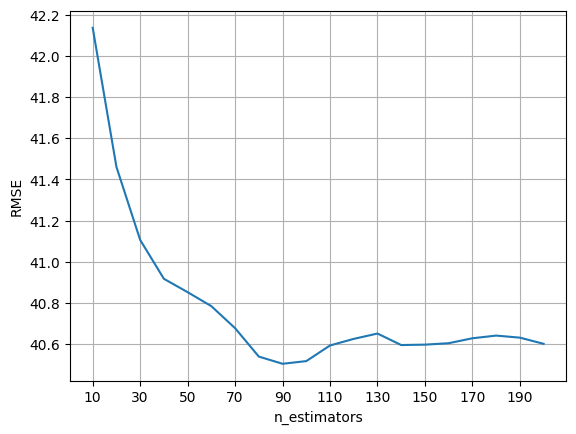

In [37]:
scores_df = pd.DataFrame(score.items(), columns=['n_estimators', 'RMSE'])
#scores_df

plt.plot(scores_df['n_estimators'], scores_df['RMSE'])
plt.xlabel('n_estimators')
plt.xticks(np.arange(10, 201, 20))
plt.ylabel('RMSE')
plt.grid()
plt.show()

## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

* 10
* 15
* 20
* 25

In [41]:
# select the best max_depth by trying different values of max_depth: [10, 15, 20, 25] and different values of n_estimators from 10 till 200 (with step 10)
score_dic = {}

for depth in [10, 15, 20, 25]:
    for n in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1, max_depth=depth)
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        score_dic[(depth, n)] = round(rmse, 3)
        #print(f"The RMSE of the Random Forest regressor with {depth} and {n} estimators is: {rmse}")

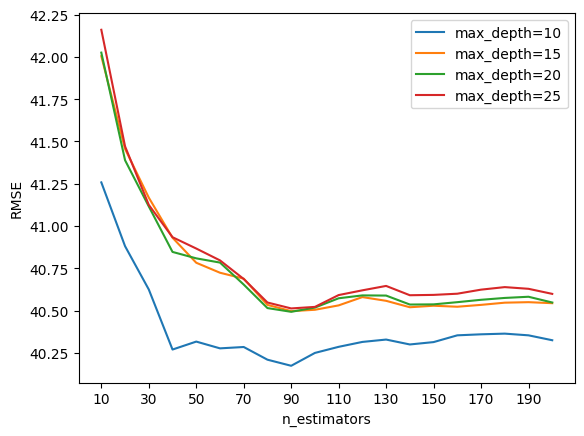

In [49]:
scores_df2 = pd.DataFrame(score_dic.items(), columns=['max_depth_n_estimators', 'RMSE'])
#scores_df2

scores_df2[['max_depth', 'n_estimators']] = pd.DataFrame(scores_df2['max_depth_n_estimators'].tolist(), index=scores_df2.index)
scores_df2 = scores_df2.drop('max_depth_n_estimators', axis=1)
#scores_df2

for m in [10, 15, 20, 25]:
    df_subset = scores_df2[scores_df2.max_depth == m]
    plt.plot(df_subset['n_estimators'], df_subset['RMSE'], label=f'max_depth={m}')
    plt.xlabel('n_estimators')
    plt.xticks(np.arange(10, 201, 20))
    plt.ylabel('RMSE')
    plt.legend()
    plt.grid()
    #plt.show()

## Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split.
When doing it, we can calculate "gain" - the reduction in impurity before and after the split.
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field.

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)?

* `study_hours_per_week`
* `attendance_rate`
* `distance_to_school`
* `teacher_quality`

In [50]:
# Train the model with these parameters: n_estimators=10, max_depth=20, random_state=1, n_jobs=-1
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1, max_depth=20)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [51]:
# What's the most important feature
names = dv.get_feature_names_out().tolist()
print(export_text(dt, feature_names=names))

|--- study_hours_per_week <= 18.50
|   |--- value: [155.24]
|--- study_hours_per_week >  18.50
|   |--- value: [188.59]



In [52]:
feature_gain = rf.feature_importances_
feature_gain

array([0.0123254 , 0.01026189, 0.06931145, 0.03151679, 0.14972903,
       0.1364858 , 0.01345934, 0.00913136, 0.00928871, 0.01038263,
       0.01771934, 0.01240405, 0.00914148, 0.        , 0.01545036,
       0.01695692, 0.01448862, 0.02291885, 0.01335761, 0.01149201,
       0.00955909, 0.00923932, 0.0089532 , 0.00840598, 0.02571426,
       0.01070798, 0.01056268, 0.24835361, 0.08268222])

In [53]:
features = dv.get_feature_names_out()

feature_importance_df = pd.DataFrame({'feature': features, 'importance': feature_gain})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
feature_importance_df

,feature,importance
27,study_hours_per_week,0.248354
4,attendance_rate,0.149729
5,distance_to_school,0.136486
28,teacher_quality,0.082682
2,age,0.069311
3,assignments_completed,0.031517
24,socioeconomic_status=High,0.025714
17,parent_involvement=High,0.022919
10,it_knowledge=High,0.017719
15,parent_education_level=Secondary,0.016957


## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [59]:
# train an XGBoost model, Install XGBoost, Create DMatrix for train and validation, Create a watchlist, Train a model with these parameters for 100 rounds
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features.tolist())
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features.tolist())

watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_scores = {}


In [60]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_rmse', 'val_rmse']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [61]:
%%capture output
# eta 0.3
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)


In [62]:
xgb_scores['eta=0.3'] = parse_xgb_output(output)

In [64]:
%%capture output
# eta 0.1
xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'reg:squarederror',
    'nthread': 8,

    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)


In [65]:
xgb_scores['eta=0.1'] = parse_xgb_output(output)

In [68]:
# Which eta leads to the best RMSE score on the validation dataset?
df_scores = pd.DataFrame()

for eta, df_score in xgb_scores.items():
    df_score['eta'] = eta
    df_scores = pd.concat([df_scores, df_score])

#df_scores
eta_03 = df_scores[df_scores['eta'] == 'eta=0.3']
eta_01 = df_scores[df_scores['eta'] == 'eta=0.1']

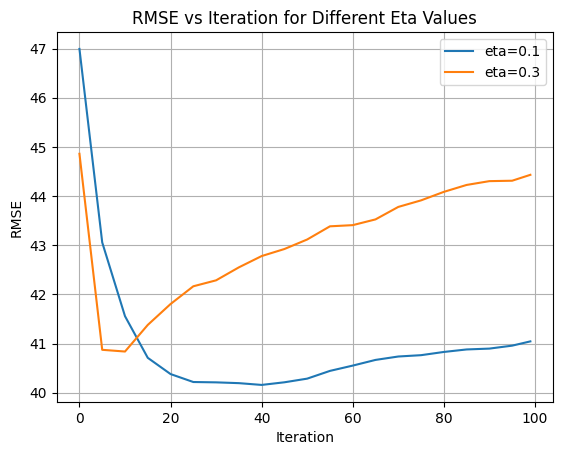

In [82]:
plt.plot(eta_01['num_iter'], eta_01['val_rmse'], label='eta=0.1')
plt.plot(eta_03['num_iter'], eta_03['val_rmse'], label='eta=0.3')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('RMSE vs Iteration for Different Eta Values')
plt.grid()
plt.legend()
plt.show()

eta **0.1** leads to the best RMSE score